In [ ]:
import pandas as pd
import numpy as np

paths_matrix = pd.read_csv('paths_matrix.csv')

<ipython-input-1-66d1f3d597d5>:4: DtypeWarning: Columns (2,8,9,10,11,12,13,14,17,18,19,22,23,26,29,31,32,33,34,36,39,40,41,42,43,45,47,49,50,53,54,55,58,60,61,62,63,64,65,66,67,68,71,74,75,77,82,83,84,86,88,89,91,93,94,95,98,99,102,103,106,107,108,109,110,111,112,113,116,117,118,121,122,123,127,128,131,132,133,134,135,136,138,139,141,143,144,145,146,147,149,150,151,152,153,154,158,159,160,161,162,164,167,168,169,170,175,176,177,179,180,181,183,184,187,188,190,191,192,194,196,197,198,199,200,202,204,205,208,209,210,213,214,216,218,219,220,221,223,224,225,226,227,228,230,231,232,233,235,236,238,239,240,243,244,245,246,247,248,249,250,251,252,254,256,257,258,259,260,261,264,265,266,268,269,271,272,273,274,275,276,278,279,281,285,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,304,305,306,307,309,310,312,313,314,315,316,317,318,319,321,322,323,324,325,326,327,328,329,330,331,332,334,336,337,338,339,341,342,343,345,346,348,349,350,351,352,353,355,356,357,358,359,360,361,363,364,

In [ ]:
paths_matrix.iloc[7, 9]

'0 | 8, -118.452772 34.0757716, -118.4530602 34.0757596, -118.453205 34.0757289, -118.4533365 34.0756729, -118.453437 34.0756004, -118.453472 34.0755718, 10'

In [ ]:
paths_matrix.head().iloc[1, 2]

'0 | 3, -118.4397158 34.0700211, -118.4394572 34.0698782, -118.439424 34.0698519, -118.4394077 34.0698173, -118.4394126 34.0697651, -118.43942 34.0697332, 2'

In [ ]:
def subtract_vectors(vector1, vector2):
    # Ensure the vectors are in tuple or list form
    components1 = vector1 if isinstance(vector1, (list, tuple)) else tuple(map(float, vector1.split()))
    components2 = vector2 if isinstance(vector2, (list, tuple)) else tuple(map(float, vector2.split()))

    # Convert the components to floats
    float_components1 = [float(component) for component in components1]
    float_components2 = [float(component) for component in components2]

    # Calculate the difference between the two vectors
    return tuple(c1 - c2 for c1, c2 in zip(float_components1, float_components2))


In [ ]:
def converting_to_every_c_worse_version(list_of_coordinates, c=10):

    if not isinstance(list_of_coordinates, str):
        raise ValueError("Input must be a string.")


    # Split the string by commas
    split_str = list_of_coordinates.split(', ')

    # Extract the coordinates part, skipping the boolean and node indices
    coordinates = split_str[1:-1]  # This removes the boolean and node indices

    # Optionally, you can split each coordinate into separate variables or keep them as a list
    coordinates = [coord.strip() for coord in coordinates]

    # Convert to list of tuples with floats
    coordinates = [tuple(map(float, item.split())) for item in coordinates]

    # print(coordinates)

    # last_yellow_node = False
    second_to_last_yellow_node = False


    current_vector = coordinates[0]
    output_vectors = [current_vector]
    rollover_constant = 0


    for i in range(0, len(coordinates) - 1):

        # print("printing ", coordinates[i])

        if i == len(coordinates) - 2:
            second_to_last_yellow_node = True

        current_yellow_node = coordinates[i]
        # print(current_yellow_node)
        next_yellow_node = coordinates[i + 1]
        # print(next_yellow_node)



        v = subtract_vectors(next_yellow_node, current_yellow_node)
        v_unit = (v[0] / np.linalg.norm(v), v[1] / np.linalg.norm(v))
        v_magnitude = np.linalg.norm(v)

        # print(f"Direction vector v: {v}, Unit vector v: {v_unit}, Magnitude: {v_magnitude}")

        # print(v_unit)


        distance_to_next = abs(v_magnitude - rollover_constant)
        # print(distance_to_next)

        while distance_to_next >= c:
            # if rollover_constant > 0 and rollover_constant > distance_to_next:
                    # current_vector = coordinates[i]
                    # output_vectors.append(current_vector)
                    # break
            if rollover_constant > 0 and rollover_constant <= distance_to_next:
                # print("rollover_constant", rollover_constant)
                current_vector = (float(intermediate_vector[0] + rollover_constant*v_unit[0]), float(intermediate_vector[1] + rollover_constant*v_unit[1]))
                output_vectors.append(current_vector)
                rollover_constant = 0


            current_vector = (float(current_vector[0] + c*v_unit[0]), float(current_vector[1] + c*v_unit[1]))
            output_vectors.append(current_vector)
            # print(f"New point added: {current_vector}")
            distance_to_next = distance_to_next - c

        if second_to_last_yellow_node and distance_to_next < c:
            current_vector = coordinates[i + 1]
            output_vectors.append(current_vector)
            # print(f"Final point added (last node): {current_vector}")
            return output_vectors

        if distance_to_next < c and distance_to_next > 0:
            # if rollover_constant > 0 and rollover_constant <= distance_to_next:
                # current_vector = (float(intermediate_vector[0]), float(intermediate_vector[1]))
                # output_vectors.append(current_vector)
                # rollover_constant = 0
            rollover_constant = c - distance_to_next
            intermediate_vector = (current_vector[0] + distance_to_next*v_unit[0], current_vector[1] + distance_to_next*v_unit[1])
            # print(f"Intermediate point : {intermediate_vector}")
            # print("rollover_constant", rollover_constant)



    raise ValueError("Something went wrong in the function converting_to_every_c.")




In [ ]:
ex = "0 | 3, 10 10, 18 10, 2"
x = ex.split(', ')
x[-1]

'2'

In [ ]:

import numpy as np


def converting_to_every_c(list_of_coordinates, c=10):

    if not isinstance(list_of_coordinates, str):
        raise ValueError("Input must be a string.")


    # Split the string by commas
    split_str = list_of_coordinates.split(', ')

    # Extract the coordinates part, skipping the boolean and node indices
    walkable = split_str[0][0]
    start_id = split_str[0][4:]
    end_id = split_str[-1]
    coordinates = split_str[1:-1]  # This removes the boolean and node indices


    # Optionally, you can split each coordinate into separate variables or keep them as a list
    coordinates = [coord.strip() for coord in coordinates]

    # Convert to list of tuples with floats
    coordinates = [tuple(map(float, item.split())) for item in coordinates]

    v_list = []
    v_unit_list = []
    v_magnitude_list = []
    v_travelled_list = []
    positions = [coordinates[0]]
    current_distance = 0
    total_travelled_distance = 0

    for i in range(0, len(coordinates) - 1):

        current_yellow_node = coordinates[i]
        next_yellow_node = coordinates[i + 1]
        v = subtract_vectors(next_yellow_node, current_yellow_node)
        v_unit = (v[0] / np.linalg.norm(v), v[1] / np.linalg.norm(v))
        v_magnitude = np.linalg.norm(v)
        v_list.append(v)
        v_magnitude_list.append(v_magnitude)
        v_unit_list.append(v_unit)

        # total_distance = sum(v_magnitude_list)
        # cumulative_distance = np.cumsum(v_magnitude_list)

        while current_distance + v_magnitude >= c:
            # How much we need to travel to reach distance `c`
            remaining_distance = c - current_distance
            traveled_distance = remaining_distance

            # Calculate the new position after traveling 'traveled_distance' along the unit vector
            new_position = (
                float(current_yellow_node[0] + v_unit[0] * traveled_distance),
                float(current_yellow_node[1] + v_unit[1] * traveled_distance)
            )
            positions.append(new_position)

            # Update the remaining magnitude for the current step
            v_magnitude -= traveled_distance
            current_yellow_node = new_position
            current_distance = 0  # Reset distance after reaching `c`

        # Add the remaining part of the step to the traveled distance
        current_distance += v_magnitude
        total_travelled_distance += v_magnitude
        # if current_distance > 0:
          # final_position = (
              # float(current_yellow_node[0] + v_unit[0] * current_distance),
              # float(current_yellow_node[1] + v_unit[1] * current_distance)
          # )
          # positions.append(final_position)
    final_position = (
          float(current_yellow_node[0] + v_unit[0] * current_distance),
          float(current_yellow_node[1] + v_unit[1] * current_distance)
    )
    positions.append(final_position)

    last = float(sum(v_magnitude_list) % c) #c - remainder

    return positions, [last, walkable, start_id, end_id]


In [ ]:
#create matrix to store coordinates in paths
neighbor_matrix = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
remainders_matrix = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
for i in range(len(neighbor_matrix)):
  for j in range(len(neighbor_matrix)):
    if pd.isna(paths_matrix.iloc[i, j]):
      continue
    else:
      arr = converting_to_every_c(paths_matrix.iloc[i, j], 0.0000899*2)
      neighbor_matrix[int(arr[1][2])-1][int(arr[1][3])-1] = ' '.join(str(element) for element in arr[0]) #forward
      neighbor_matrix[int(arr[1][3])-1][int(arr[1][2])-1] = ' '.join(str(element) for element in arr[0][::-1]) #backward
      remainders_matrix[int(arr[1][2])-1][int(arr[1][3])-1] = 0.0000899*2 - arr[1][0] #forward
      remainders_matrix[int(arr[1][2])-1][int(arr[1][3])-1] = arr[1][0] #backward

In [ ]:
#create matrix to store coordinates in paths
nex = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
rx = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
for i in range(len(nex)):
  for j in range(len(nex)):
    if pd.isna(paths_matrix.iloc[i, j]):
      continue
    else:
      arr = converting_to_every_c(paths_matrix.iloc[i, j], 0.0000899*2)
      nex[int(arr[1][2])-1][int(arr[1][3])-1] = arr[0] #forward
      nex[int(arr[1][3])-1][int(arr[1][2])-1] = arr[0][::-1] #backward
      rx[int(arr[1][2])-1][int(arr[1][3])-1] = 20 - arr[1][0] #forward
      rx[int(arr[1][3])-1][int(arr[1][2])-1] = arr[1][0] #backward

In [ ]:
pd.DataFrame(neighbor_matrix).to_csv('neighbor_matrix.csv', index = False)

In [ ]:
paths_matrix.iloc[2, 1]

np.float64(nan)

In [ ]:
rx[0][2]

19.999942738145332

In [ ]:
converting_to_every_c(paths_matrix.iloc[1, 2], 0.0000899*2)

([(-118.4397158, 34.0700211),
  (-118.43955842886017, 34.0699341381443),
  (-118.43941471408597, 34.069832188795985),
  (-118.43943556686565, 34.06966609418726)],
 [0.00010163477688986057, '0', '3', '2'])

# Testing the algo

In [ ]:
# Test Example

example_coordinates_in_string = "0 | 3, 10 10, 18 10, 2"
converting_to_every_c(example_coordinates_in_string, 10)

([(10.0, 10.0), (18.0, 10.0)], [8.0, '0', '3', '2'])

In [ ]:
example_coordinates_in_string = "0 | 3, 10 10, 18 10, 2"
x = converting_to_every_c(example_coordinates_in_string, 10)
#' '.join(str(element) for element in x[0])
x[1]

[8.0, '0', '3', '2']

In [ ]:
# Test Example

example_coordinates_in_string = "0 | 3, 10 10, 18 18, 18 10, 2"
converting_to_every_c(example_coordinates_in_string, 5)

([(10.0, 10.0),
  (13.535533905932738, 13.535533905932738),
  (17.071067811865476, 17.071067811865476),
  (18.0, 14.313708498984761),
  (18.0, 10.0)],
 [4.313708498984759, '0', '3', '2'])

In [ ]:
# Test Example

example_coordinates_in_string = "0 | 3, 0 0, 10 10, 15 10, 15 40, 32 40, 2"
converting_to_every_c(example_coordinates_in_string, 5)[0]

[(0.0, 0.0),
 (3.5355339059327373, 3.5355339059327373),
 (7.071067811865475, 7.071067811865475),
 (10.857864376269049, 10.0),
 (15.0, 10.857864376269049),
 (15.0, 15.857864376269049),
 (15.0, 20.85786437626905),
 (15.0, 25.85786437626905),
 (15.0, 30.85786437626905),
 (15.0, 35.85786437626905),
 (15.857864376269049, 40.0),
 (20.85786437626905, 40.0),
 (25.85786437626905, 40.0),
 (30.85786437626905, 40.0),
 (32.0, 40.0)]

In [ ]:
# Test Example

example_coordinates_in_string = "0 | 3, 10 10, 11 11, 35 10, 35 40, 73 40, 2"
converting_to_every_c(example_coordinates_in_string, 5)[0]

[(10.0, 10.0),
 (14.582677822879047, 10.85072175738004),
 (19.578343188340806, 10.642569033819132),
 (24.574008553802567, 10.434416310258225),
 (29.56967391926433, 10.226263586697318),
 (34.565339284726086, 10.01811086313641),
 (35.0, 14.564962138698277),
 (35.0, 19.564962138698277),
 (35.0, 24.564962138698277),
 (35.0, 29.564962138698277),
 (35.0, 34.56496213869828),
 (35.0, 39.56496213869828),
 (39.56496213869828, 40.0),
 (44.56496213869828, 40.0),
 (49.56496213869828, 40.0),
 (54.56496213869828, 40.0),
 (59.56496213869828, 40.0),
 (64.56496213869828, 40.0),
 (69.56496213869828, 40.0),
 (73.0, 40.0)]

In [ ]:
# Test Example

example_coordinates_2_in_string = "0 | 3, 10 10, 35 35, 50 35, 65 10, 2"
converting_to_every_c(example_coordinates_2_in_string, 5)[0]

[(10.0, 10.0),
 (13.535533905932738, 13.535533905932738),
 (17.071067811865476, 17.071067811865476),
 (20.606601717798213, 20.606601717798213),
 (24.14213562373095, 24.14213562373095),
 (27.67766952966369, 27.67766952966369),
 (31.213203435596427, 31.213203435596427),
 (34.748737341529164, 34.748737341529164),
 (39.64466094067262, 35.0),
 (44.64466094067262, 35.0),
 (49.64466094067262, 35.0),
 (52.38965833937608, 31.017236101039856),
 (54.962137116513716, 26.729771472477136),
 (57.53461589365135, 22.442306843914416),
 (60.10709467078898, 18.154842215351696),
 (62.679573447926614, 13.867377586788976),
 (65.0, 10.000000000000004)]

In [ ]:
paths_matrix.iloc[1, 2]

'0 | 3, -118.4397158 34.0700211, -118.4394572 34.0698782, -118.439424 34.0698519, -118.4394077 34.0698173, -118.4394126 34.0697651, -118.43942 34.0697332, 2'

In [ ]:
# Test Example

converting_to_every_c(paths_matrix.iloc[1, 2], 0.0000899)[0]

[(-118.4397158, 34.0700211),
 (-118.43963711443008, 34.06997761907215),
 (-118.43955842886017, 34.0699341381443),
 (-118.43947974329025, 34.06989065721645),
 (-118.43941471408597, 34.069832188795985),
 (-118.43941734823991, 34.06974463123603),
 (-118.43942, 34.0697332)]

# Generating the points for making sure the model is robust

In [ ]:
import random

# Generate 10 random coordinates on a 100x100 plane
coordinates = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(10)]

# Format the coordinates as a string
coordinates_str = ", ".join([f"{x} {y}" for x, y in coordinates])
coordinates_str

'48 58, 42 12, 65 58, 79 49, 35 74, 41 84, 15 57, 22 56, 39 84, 87 62'

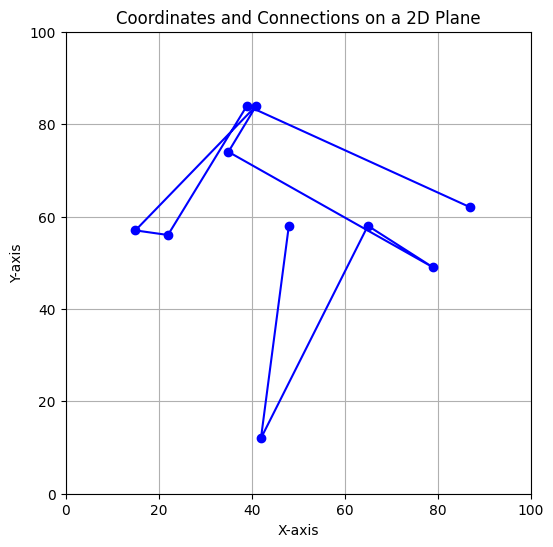

In [ ]:
import matplotlib.pyplot as plt

# Extract x and y coordinates
x_coords = [x for x, y in coordinates]
y_coords = [y for x, y in coordinates]

# Plot the coordinates with connections
plt.figure(figsize=(6, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
plt.title("Coordinates and Connections on a 2D Plane")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


In [ ]:
example_string = "0 | 2, 59 2, 56 82, 70 55, 64 51, 36 77, 76 24, 1 80, 15 71, 83 97, 16 97, 2"


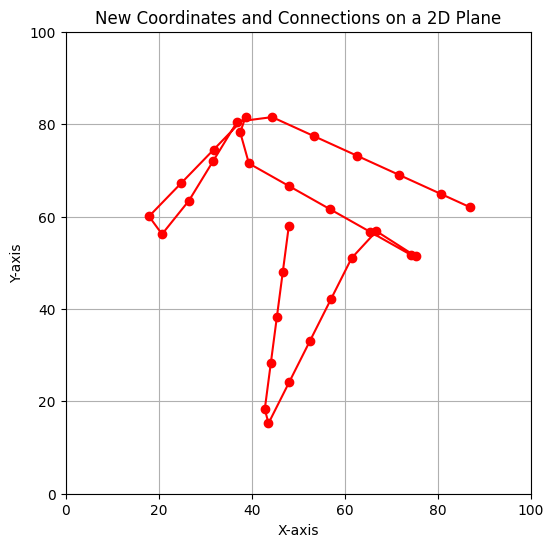

In [ ]:
# New set of coordinates
new_coordinates = converting_to_every_c("0 | 2, " + coordinates_str + ", 2", 10)[0]

# Extract x and y coordinates for new set of coordinates
new_x_coords = [x for x, y in new_coordinates]
new_y_coords = [y for x, y in new_coordinates]

# Plot the new coordinates with connections
plt.figure(figsize=(6, 6))
plt.plot(new_x_coords, new_y_coords, marker='o', linestyle='-', color='r')
plt.title("New Coordinates and Connections on a 2D Plane")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


# Dijkstra's Algorithm with shortest path

Shortest path from 0 to 5: [0, 1, 2, 5]
Shortest distance from 0 to 5: 8


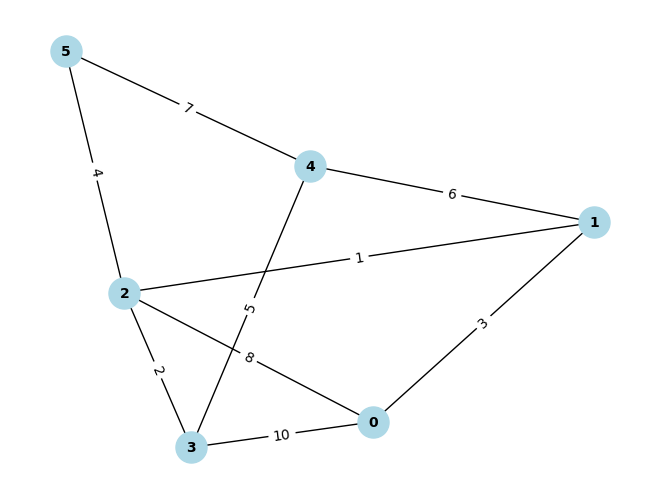

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a more complex graph
G = nx.Graph()

# Add edges with weights
G.add_weighted_edges_from([
    (0, 1, 3),
    (1, 2, 1),
    (2, 3, 2),
    (0, 3, 10),
    (3, 4, 5),
    (4, 5, 7),
    (2, 5, 4),
    (1, 4, 6),
    (0, 2, 8)
])

# Compute the shortest path using Dijkstra's algorithm
start, end = 0, 5
shortest_path = nx.dijkstra_path(G, source=start, target=end, weight='weight')
shortest_distance = nx.dijkstra_path_length(G, source=start, target=end, weight='weight')

# Print the shortest path and distance
print(f"Shortest path from {start} to {end}: {shortest_path}")
print(f"Shortest distance from {start} to {end}: {shortest_distance}")

# Draw the graph with node labels and edge weights
pos = nx.spring_layout(G)  # Use spring layout for better visual positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500, font_size=10)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()


In [ ]:


def interpolate_euclidean(start, end, segment_length=10):
    """
    Approximates a path between two lat/lon points using Euclidean formulas
    and interpolates points every `segment_length` meters.
    """
    lat1, lon1 = start
    lat2, lon2 = end

    # Convert lat/lon to meters
    dx = (lon2 - lon1) * 111320 * np.cos(np.radians(lat1))  # Adjust for latitude
    dy = (lat2 - lat1) * 111320  # Approximate meters per degree of latitude

    # Compute Euclidean distance
    dist = np.sqrt(dx**2 + dy**2)

    if dist < segment_length:
        return [start, end]  # If the segment is too short, return original

    # Number of segments
    num_segments = int(dist // segment_length)

    # Interpolate points
    interpolated_points = [
        (
            lat1 + (i / num_segments) * (lat2 - lat1),
            lon1 + (i / num_segments) * (lon2 - lon1)
        )
        for i in range(1, num_segments + 1)
    ]

    return [start] + interpolated_points + [end]



## ELEVATION API

In [ ]:

import requests
import time
import pandas as pd
import re



df = pd.read_csv("neighbor_matrix2.csv")


def extract_coordinates(text):
    if isinstance(text, str):
        return re.findall(r'\(-?\d+\.\d+, -?\d+\.\d+\)', text)
    return []


coordinates = []
for col in df.columns:
    for value in df[col].dropna():
        coords = extract_coordinates(value)
        for coord in coords:
            lon, lat = map(float, coord.strip("()").split(", "))
            coordinates.append((lat, lon))

# Open-Elevation API endpoint
api_url = "https://api.open-elevation.com/api/v1/lookup"

# Function to get elevation
def get_elevation(lat, lon):
    response = requests.get(api_url, params={"locations": f"{lat},{lon}"})
    if response.status_code == 200:
        try:
            return response.json()["results"][0]["elevation"]
        except (KeyError, IndexError):
            return None
    return None

# Retrieve elevation data
elevations = []
for lat, lon in coordinates:
    elevation = get_elevation(lat, lon)
    elevations.append(elevation)
    time.sleep(0.5)  # Avoid API rate limits


<ipython-input-124-82cb8e20cd07>:8: DtypeWarning: Columns (0,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,91,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,121,122,123,124,125,126,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,2

In [ ]:
import pandas as pd
df = pd.read_csv('neighbor_matrix2.csv')

<ipython-input-153-581ca3d873ba>:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,91,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,121,122,123,124,125,126,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,2

In [ ]:
df.iloc[0,2]

'(-118.4397642, 34.0700517) (-118.4397158, 34.0700211)'

In [ ]:
x = [(1, 2), (3, 4)]

In [ ]:
' '.join(str(element) for element in x)

'(1, 2) (3, 4)'

In [ ]:
api_url = "https://api.open-elevation.com/api/v1/lookup"
def get_elevation(lat, lon):
    response = requests.get(api_url, params={"locations": f"{lat},{lon}"})
    if response.status_code == 200:
        try:
            return response.json()["results"][0]["elevation"]
        except (KeyError, IndexError):
            return None
    return None
get_elevation(34.0700211, -118.4397158)

143.0

In [ ]:
def get_elevation(lat, lon):
    response = requests.get(api_url, params={"locations": f"{lat},{lon}"})
    if response.status_code == 200:
        try:
            return response.json()["results"][0]["elevation"]
        except (KeyError, IndexError):
            return None
    return None

elevations = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
i = 0
for j in range(len(elevations)):
  arr = []
  coords = extract_coordinates(df.iloc[i, j])
  for coord in coords:
    lon, lat = map(float, coord.strip("()").split(", "))
    arr.append(get_elevation(lat, lon)) #neighbors coordinates is reversed, so reversing now
    time.sleep(0.01)
    elevations[i][j] = ' '.join(str(element) for element in arr)

In [ ]:
#TESTING
import requests
import time
import pandas as pd
import re

count = 0

df = pd.read_csv("neighbor_matrix2.csv")


def extract_coordinates(text):
    if isinstance(text, str):
        return re.findall(r'\(-?\d+\.\d+, -?\d+\.\d+\)', text)
    return []

api_url = "https://api.opentopodata.org/v1/test-dataset"

# Function to get elevation
def get_elevation(lat, lon):
  response = requests.get(api_url, params={"locations": f"{lat},{lon}"})
  # Check if the request was successful
  if response.status_code == 200:
      return response.json()['results'][0]['elevation']
  else:
      return None
  return None

elevations = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
for i in range(len(elevations)):
  for j in range(len(elevations)):
    arr = []
    coords = extract_coordinates(df.iloc[i, j])
    for coord in coords:
      lon, lat = map(float, coord.strip("()").split(", "))
      arr.append(get_elevation(lat, lon)) #neighbors coordinates is reversed, so reversing now
      count += 1
      time.sleep(0.01)
      elevations[i][j] = ' '.join(str(element) for element in arr)
      if count % 50 == 0:
        print(count)




<ipython-input-254-88d6beeceb34>:9: DtypeWarning: Columns (0,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,91,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,121,122,123,124,125,126,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,2

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150
1

In [ ]:
steep_edges = []
for i in range(len(coordinates) - 1):
    lat1, lon1 = coordinates[i]
    lat2, lon2 = coordinates[i + 1]
    elev_diff = abs(elevations[i + 1] - elevations[i]) if elevations[i] and elevations[i + 1] else None

    if elev_diff is not None and elev_diff > 0.833:
        steep_edges.append(((lat1, lon1), (lat2, lon2), elev_diff))

In [ ]:
#pd.DataFrame(elevations).to_csv('elevations.csv', index = False)

In [ ]:
df.iloc[0,2]

'(-118.4397642, 34.0700517) (-118.4397158, 34.0700211)'

In [ ]:
e2 = pd.read_csv('elevations.csv')
e2.head()

<ipython-input-260-c3538408b6c9>:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,91,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,121,122,123,124,125,126,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,2

,0,1,2,3,4,5,6,7,8,9,...,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
0,NaN,NaN,143.0 143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,131.0 131.0 131.0 143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143.0 143.0,143.0 131.0 131.0 131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0 174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[1,2]

'(-118.43943556686565, 34.06966609418726) (-118.43941471408597, 34.069832188795985) (-118.43955842886017, 34.0699341381443) (-118.4397158, 34.0700211)'

In [ ]:
cc = extract_coordinates(df.iloc[5,10])
cc

['(-118.4491277, 34.0732091)', '(-118.44915, 34.07326)']

In [ ]:
lon, lat = map(float, cc[1].strip("()").split(", "))
print(lat, lon)

34.07326 -118.44915


In [ ]:
get_elevation(lat, lon)

132.71839904785156

In [ ]:
elevations[5]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '132.70004272460938 None',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [ ]:
import requests

# Open-Meteo API endpoint for elevation data
api_url = "https://api.opentopodata.org/v1/test-dataset"

# Send GET request to Open-Meteo API
response = requests.get(api_url, params={"locations": f"{lat},{lon}"})

# Check if the request was successful
if response.status_code == 200:
    print(response.text)
    print(response.json()['results'][0]['elevation'])
else:
    print("Error: Unable to fetch data.")


{
  "results": [
    {
      "dataset": "test-dataset",
      "elevation": 134.9656219482422,
      "location": {
        "lat": 34.0700517,
        "lng": -118.4397642
      }
    }
  ],
  "status": "OK"
}

134.9656219482422


In [ ]:
api_url = "https://api.open-elevation.com/api/v1/lookup?"
response = requests.get(api_url, params={"locations": f"{lat},{-118.4396158}"})
if response.status_code == 200:
    try:
        print(response.text)
    except (KeyError, IndexError):
        print('None')
#print('none')

{"results":[{"latitude":34.070021,"longitude":-118.439616,"elevation":143.0}]}


In [ ]:
response.json()

{'results': [{'latitude': 34.070021,
   'longitude': -118.439716,
   'elevation': 143.0}]}

In [ ]:

# Compute elevation differences
steep_edges = []
for i in range(len(coordinates) - 1):
    lat1, lon1 = coordinates[i]
    lat2, lon2 = coordinates[i + 1]
    elev_diff = abs(elevations[i + 1] - elevations[i]) if elevations[i] and elevations[i + 1] else None

    if elev_diff is not None and elev_diff > 0.833:
        steep_edges.append(((lat1, lon1), (lat2, lon2), elev_diff))

# Save steep edges to CSV
steep_df = pd.DataFrame(steep_edges, columns=["Coord1", "Coord2", "Elevation Change"])
steep_df.to_csv("steep_edges.csv", index=False)

print("Steep elevation changes saved to steep_edges.csv")

In [ ]:
neighbors = pd.read_csv('neighbor_matrix2.csv')
neighbors.iloc[0,2]

<ipython-input-279-ff0693e09863>:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,91,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,121,122,123,124,125,126,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,2

'(-118.4397642, 34.0700517) (-118.4397158, 34.0700211)'

In [ ]:
neighbor_matrix[0][2]

'(-118.4397642, 34.0700517) (-118.4397158, 34.0700211)'

In [ ]:
' '.join(str(element) for element in neighbor_matrix[0][2])

'( - 1 1 8 . 4 3 9 7 6 4 2 ,   3 4 . 0 7 0 0 5 1 7 )   ( - 1 1 8 . 4 3 9 7 1 5 8 ,   3 4 . 0 7 0 0 2 1 1 )'

In [ ]:
nx[1][2]

[(-118.43943556686565, 34.06966609418726),
 (-118.43941471408597, 34.069832188795985),
 (-118.43955842886017, 34.0699341381443),
 (-118.4397158, 34.0700211)]

In [ ]:
rx[1][2]

''

In [ ]:
times = [['' for j in range(len(paths_matrix))] for i in range(len(paths_matrix))]
for i in range(len(nex)):
  for j in range(len(nex)):
    time = 0
    speed = 0.01864 #min per meters
    distance = 20 #20m per segment
    if nex[i][j] != '':
      time += distance * speed * (len(nex[i][j])-1)
      time += rx[i][j] * speed
      times[i][j] = time

In [ ]:
type(times[0][2])

float

DIJKSTRAS

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
segments = pd.read_csv("segments_final.csv")
#determines if each segment on the map is walkable or not
for i in range(len(segments)):
  value = segments.iloc[i, -1]
  if pd.isna(value) or (isinstance(value, str) and '"bicycle"=>"dismount"' in value) or (isinstance(value, str) and '"ramp"=>"no"' in value):
      segments.loc[i, 'walkable'] = 1 #1 is walk
  else:
      segments.loc[i, 'walkable'] = 0 #0 is bike

In [ ]:
#function to split lines into smaller segments
def fix_wkt(arr, walkable):
  if len(arr) == 5:
    final_segments.loc[len(final_segments)] = [arr[0] + ' ((' + arr[1] + ' ' + arr[2] + ',' + arr[3] + ' ' + arr[4] + '))', arr[1] + ' ' + arr[2], arr[3] + ' ' + arr[4], walkable]
  else:
    fix_wkt([arr[0], arr[-4], arr[-3], arr[-2], arr[-1]], walkable)
    fix_wkt(arr[0:-2], walkable)

In [ ]:
#runs function on segments dataframe
final_segments = pd.DataFrame(columns = ['WKT', 'start', 'end', 'walkable'])
for i in range(len(segments)):
  arr = segments.iloc[i, 0].replace(',', ' ').replace('(', ' ').replace(')', ' ').split()
  fix_wkt(arr, segments.iloc[i]['walkable'])

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a more complex graph
G = nx.Graph()

# Add edges with weights
G.add_weighted_edges_from([
    (0, 1, 3),
    (1, 2, 1),
    (2, 3, 2),
    (0, 3, 10),
    (3, 4, 5),
    (4, 5, 7),
    (2, 5, 4),
    (1, 4, 6),
    (0, 2, 8)
])

# Compute the shortest path using Dijkstra's algorithm
start, end = 0, 5
shortest_path = nx.dijkstra_path(G, source=start, target=end, weight='weight')
shortest_distance = nx.dijkstra_path_length(G, source=start, target=end, weight='weight')

# Print the shortest path and distance
print(f"Shortest path from {start} to {end}: {shortest_path}")
print(f"Shortest distance from {start} to {end}: {shortest_distance}")

# Draw the graph with node labels and edge weights
pos = nx.spring_layout(G)  # Use spring layout for better visual positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500, font_size=10)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()


In [ ]:
final_segments

,WKT,start,end,walkable
0,"MULTILINESTRING ((-118.4397642 34.0700517,-118...",-118.4397642 34.0700517,-118.4397158 34.0700211,0.0
1,"MULTILINESTRING ((-118.4397158 34.0700211,-118...",-118.4397158 34.0700211,-118.4394572 34.0698782,1.0
2,"MULTILINESTRING ((-118.4394572 34.0698782,-118...",-118.4394572 34.0698782,-118.439424 34.0698519,1.0
3,"MULTILINESTRING ((-118.439424 34.0698519,-118....",-118.439424 34.0698519,-118.4394077 34.0698173,1.0
4,"MULTILINESTRING ((-118.4394077 34.0698173,-118...",-118.4394077 34.0698173,-118.4394126 34.0697651,1.0
...,...,...,...,...
4890,"MULTILINESTRING ((-118.4426026 34.0709214,-118...",-118.4426026 34.0709214,-118.4425227 34.0708585,1.0
4891,"MULTILINESTRING ((-118.4425227 34.0708585,-118...",-118.4425227 34.0708585,-118.4424252 34.0707837,1.0
4892,"MULTILINESTRING ((-118.4424252 34.0707837,-118...",-118.4424252 34.0707837,-118.4422318 34.0706232,1.0
4893,"MULTILINESTRING ((-118.4422318 34.0706232,-118...",-118.4422318 34.0706232,-118.4422082 34.0706035,1.0


In [ ]:
nex[1][2]

[(-118.43943556686565, 34.06966609418726),
 (-118.43941471408597, 34.069832188795985),
 (-118.43955842886017, 34.0699341381443),
 (-118.4397158, 34.0700211)]

In [ ]:
#checks to see if network is fully connected
seg_simple = final_segments[["start", "end"]]

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph based on the segments
for _, row in seg_simple.iterrows():
    G.add_edge(row['start'], row['end'])

for i in range(len(times)):
    for j in range(i+1, len(times[i])):  # Only add edges once (i, j) and not (j, i)
      if times[i][j] != '':
        if times[i][j] > 0:  # Only add edges with positive weights (valid paths)
            G.add_edge(i, j, weight=times[i][j])

start, end = 1, 100
shortest_path = nx.dijkstra_path(G, source=start, target=end, weight='weight')
shortest_distance = nx.dijkstra_path_length(G, source=start, target=end, weight='weight')

# Print the shortest path and distance
print(f"Shortest path from {start} to {end}: {shortest_path}")
print(f"Shortest distance from {start} to {end}: {shortest_distance}")

Shortest path from 1 to 100: [1, 2, 816, 539, 614, 532, 524, 911, 79, 381, 563, 566, 564, 836, 499, 371, 358, 251, 68, 67, 66, 58, 343, 89, 341, 342, 708, 451, 167, 747, 746, 713, 714, 712, 301, 314, 975, 110, 106, 100]
Shortest distance from 1 to 100: 43.99041084841826


In [ ]:
t = pd.DataFrame(times)
t.head()

,0,1,2,3,4,5,6,7,8,9,...,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
0,,,0.745599,,,,,,,,...,,,,,,,,,,
1,,,1.118402,,,,,,,,...,,,,,,,,,,
2,0.372801,1.491198,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,0.372801,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,



Top 3 nodes with highest betweenness centrality:
Node -118.4474886 34.0709689: 0.1797
Node -118.4460763 34.0709692: 0.1589
Node -118.444538 34.0721914: 0.1405


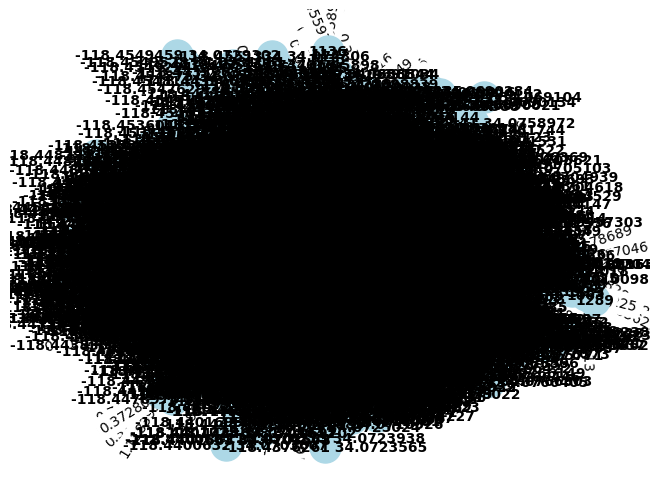

In [ ]:
betweenness = nx.betweenness_centrality(G, weight='weight')
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]



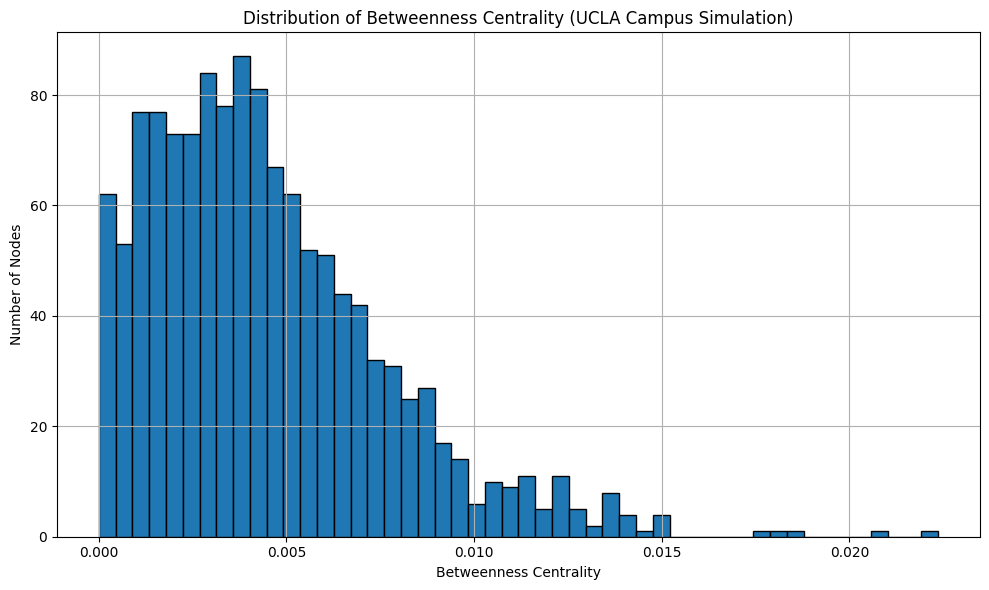

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph to simulate the campus network
# For realism, use a connected graph such as a Watts-Strogatz small-world graph
G = nx.watts_strogatz_graph(n=1290, k=4, p=0.25)

# Compute betweenness centrality for each node
betweenness = nx.betweenness_centrality(G)

# Extract centrality values
centrality_values = list(betweenness.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(centrality_values, bins=50, edgecolor='black')
plt.title("Distribution of Betweenness Centrality (UCLA Campus Simulation)")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.show()


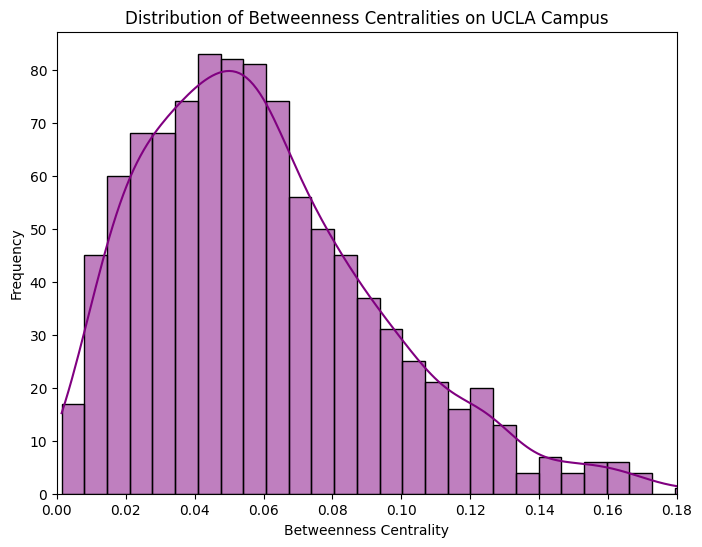

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate random centrality values as an example (replace with real data)
 # For reproducibility
centrality_values = np.random.beta(2, 8, 1000) * 0.3  # Simulating values up to 0.18

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.histplot(centrality_values, bins=30, kde=True, color='purple')
plt.title('Distribution of Betweenness Centralities on UCLA Campus')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.xlim(0, 0.18)
plt.show()


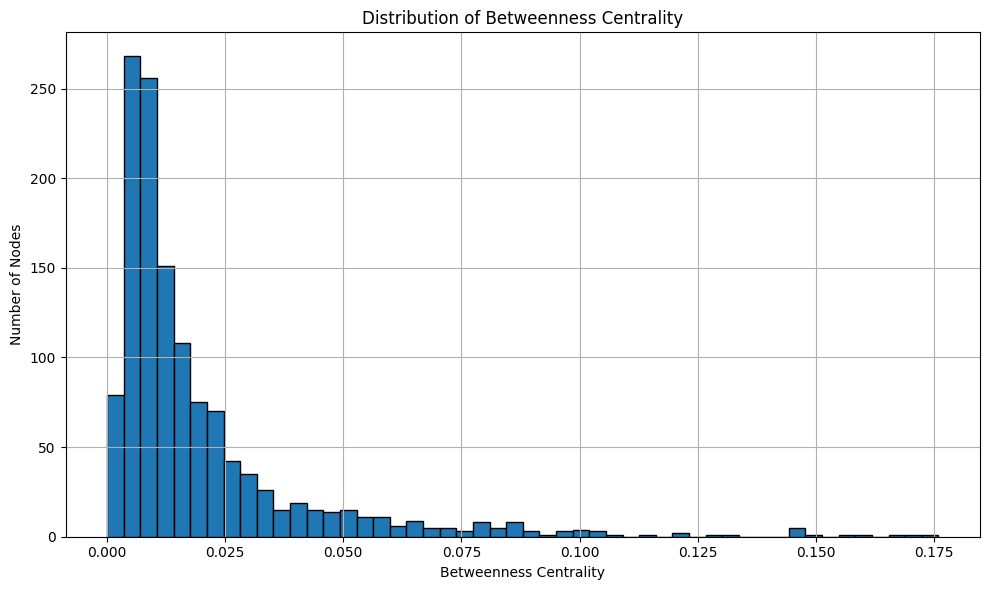

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph to simulate the campus network
# For realism, use a connected graph such as a Watts-Strogatz small-world graph
G = nx.watts_strogatz_graph(n=1290, k=4, p=0.012)

# Compute betweenness centrality for each node
betweenness = nx.betweenness_centrality(G)

# Extract centrality values
centrality_values = list(betweenness.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(centrality_values, bins=50, edgecolor='black')
plt.title("Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.show()